In [116]:
# A Monetary Circuit SFC Model
#
# Author: Marco Veronese Passarella
#
# Last change: 10/03/2022
#
# Note: this Phyton code reproduces the experiments discussed in: Veronese Passarella,
# M. (2022) "It is not la vie en rose. New insights from Graziani's theory of
# monetary circuit", PKES Working Paper No. 2209, March 2022.
#
# Errata corrige:
# alpha0w = 23 (instead of 5) under the baseline scenario; 
# alpha0w = 24 (instead of 7) under scenario 1;
# alpha0z = 2.5 (instead of 5) under the baseline scenario; 
# alpha0z = 3.5 (instead of 7) under scenario 1;
# 
# The above changes are necessary to keep vz from falling below 0 under the
# steady state, while matching Model BMW baseline values. Notice that qualitative
# results are unaffected. 

In [117]:
%%html
<script>
    // Auto-run cells on notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [118]:
#Import packages
%matplotlib inline
from ipywidgets import interactive 
import matplotlib.pyplot as plt 
import numpy as np

In [119]:
#Import steady-state values
import pandas as pd
df = pd.read_csv("https://www.dropbox.com/s/u4mmt2v6b29h68o/data00.csv?dl=1")

In [120]:
#Select type of investment function 
inv_opt = 1                                            #Note: 0 = standard SFC; 1 = circuit 

#Number of periods
nPeriods = 200

#Number of scenarios
nScenarios=5 

In [121]:
#Set parameters and exogenous variables 
delta=0.1                                              #Depreciation rate of capital stock
pr=1                                                   #Labor productivity
r_bar=0.04                                             #Policy rate
w=0.72                                                 #Wage rate 
alpha1w=0.757621 #(0.70)                               #Propensity to consume out of wages
alpha2w=0.1                                            #Propensity to consume out of workers' wealth
alpha1z=0.69     #(0.70)                               #Propensity to consume out of profits 
alpha2z=0.1                                            #Propensity to consume out of capitalists' wealth
lambdaw=0.5                                            #Workers' share of deposits to total wealth (liquidity preference)  
lambdaz=0.5                                            #Capitalists' share of deposits to total wealth (liquidity preference)  
gamma=0.15                                             #Speed of adjustment of current investment to target level
psi0=0                                                 #Coefficient of adaptive expectations: fixed
psi1=0.1  

In [122]:
#Set values of coefficients that are shocked
alpha0w=23*np.ones([nScenarios,nPeriods],dtype = float)             #Autonomous consumption of workers
alpha0z=2.5*np.ones([nScenarios,nPeriods],dtype = float)            #Autonomous consumption of capitalists
beta=0.1*np.ones([nScenarios,nPeriods],dtype = float)               #Target investment share to total income
sigma=np.ones([nScenarios,nPeriods],dtype = float)                  #Coefficient of real supply function (note: 1 = full adjustment to demand; 0 = fully exogenous)
iota=np.ones([nScenarios,nPeriods],dtype = float)                   #Coefficient of additional interest payments (0 = no extra payments; 1 = extra payments)
kappa=np.ones([nScenarios,nPeriods],dtype = float)                  #Target capital to output ratio
par_id=np.ones([nScenarios,nPeriods],dtype = float)                 #Coefficient defining type of investment (1 = endogenous; 0 = exogenous)
alpha3=np.zeros([nScenarios,nPeriods],dtype = float)                #Exogenous investment
gammay=0.15*np.ones([nScenarios,nPeriods],dtype = float)            #Speed of adjustment of potential output to current one  

In [123]:
#Define and set initial value of variables
y_n=(df['y_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)   #Real output: exogenous supply
p=np.ones([nScenarios,nPeriods],dtype = float)                      #Unit price

In [124]:
#Define variables
af=(df['af_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Amortization funds
c=(df['c_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)             #Total demand of consumption goods
cw=(df['cw_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Consumption goods demanded by workers
cz=(df['cz_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Consumption goods demanded by capitalists
da=(df['da_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Depreciation allowances (real)
k=(df['k_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)             #Actual stock of capital
kt=(df['k_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)            #Target stock of capital
ld=(df['ld_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Demand for bank loans 
ls=(df['ls_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Supply of bank loans 
idd=(df['id_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)          #Demand for investment
ms=(df['ms_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Supply of bank deposits
n=(df['n_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)             #Employed workers (direct labor time)
wb=(df['wb_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Wage bill 
y=(df['y_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)             #Total income
ydw=(df['ydw_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Disposal income of workers
ydz=(df['ydz_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Disposal income of capitalists
yd=(df['yd_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Total disposal income of households
fin_i=(df['fin_i_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)     #Initial finance to production
fin_f=(df['fin_f_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)     #Final finance
bs=(df['bs_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Supply for private securities
rb=r_bar*np.ones([nScenarios,nPeriods],dtype = float)                     #Rate of return on private securities
rl=r_bar*np.ones([nScenarios,nPeriods],dtype = float)                     #Rate of interest on banks loans
rm=r_bar*np.ones([nScenarios,nPeriods],dtype = float)                     #Rate of interest on bank deposits
vw=(df['vw_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Wealth of workers
bw=(df['bw_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Demand for private securities by workers
mw=(df['mw_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Bank deposits held by workers by workers
vz=(df['vz_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Wealth of capitalists
bz=(df['bz_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Demand for private securities by capitalists
mz=(df['mz_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Bank deposits held by workers by capitalists
vh=(df['vh_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Wealth of households
bh=(df['bh_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Total demand for private securities
mh=(df['mh_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Total bank deposits held by workers
idt=(df['idt_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Target investment
p_e=(df['p_e_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Expected price
paym_l=(df['paym_l_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)   #Interest payments on loans
paymw_m=(df['paymw_m_0'][0])*np.ones([nScenarios,nPeriods],dtype = float) #Interest payments on deposits paid to workers
paymz_m=(df['paymz_m_0'][0])*np.ones([nScenarios,nPeriods],dtype = float) #Interest payments on deposits paid to capitalists
paym_m=(df['paym_m_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)   #Total interest payments on deposits
paymw_b=(df['paymw_b_0'][0])*np.ones([nScenarios,nPeriods],dtype = float) #Interest payments on private securities paid to workers
paymz_b=(df['paymz_b_0'][0])*np.ones([nScenarios,nPeriods],dtype = float) #Interest payments on private securities paid to capitalists
paym_b=(df['paym_m_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)   #Total interest payments on securities
pb=(df['pb_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Bank profit
cw_r=(df['cw_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)       #Real consumption of workers
cw_r_t=(df['cw_r_t_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)   #Expected real consumption of workers
cz_r=(df['cz_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)       #Real consumption of capitalists
c_r=(df['c_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Real consumption of households
c_r_t=(cw_r_t+cz_r)*np.ones([nScenarios,nPeriods],dtype = float)          #Total expected real consumption 
id_r=(df['id_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)       #Real investment
y_r=(df['y_r_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Real output
y_s=(df['y_s_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Real output: actual supply
y_g=(df['y_g_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Real output gap
pf=(df['pf_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)           #Profit of firms
slt=(df['slt_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Surplus labor
nlt=(df['nlt_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)         #Necessary labor time
expl=(df['expl_0'][0])*np.ones([nScenarios,nPeriods],dtype = float)       #Exploitation rate

In [125]:
#Begin the model

#Choose scenario
j = 1
for j in range (1,nScenarios):

    #Define time loop
    i = 1
    for i in range(1,nPeriods):
    
        #Define iterations
        x = 1
        for x in range (1,200):    
            
            
            #Experiments
            
            #Shock to autonomous consumption
            if i >= 10 and j==1:
                alpha0w[j,i] = 24
                alpha0z[j,i] = 3.5
                
            #Shock investment (quantity adjustment)
            if i >= 10 and j==2:
                alpha3[j,i] = 25
                par_id[j,i] = 0
            
            #Shock investment (mixed adjustment)
            if i >= 10 and j==3:
                alpha3[j,i] = 25
                par_id[j,i] = 0
                sigma[j,i] = 0
            
            #Shock investment (mixed adjustment)
            if i >= 10 and j==4:
                alpha3[j,i] = 25
                par_id[j,i] = 0
                sigma[j,i] = 0
                gammay[j,i] = 0
                
                       
            #Model equations
            
            #Households: workers and capitalists
            ydw[j,i] = wb[j,i] + paymw_m[j,i] + paymw_b[j,i]                         #Disposable income of workers
            ydz[j,i] =  pb[j,i] + pf[j,i] + paymz_m[j,i] + paymz_b[j,i]              #Disposable income of capitalists
            yd[j,i] =  ydw[j,i] + ydz[j,i]                                           #Total disposable income of households
            vw[j,i] = vw[j,i-1] + ydw[j,i] - cw[j,i]                                 #Stock of wealth of workers
            vz[j,i] = vz[j,i-1] + ydz[j,i] - cz[j,i]                                 #Stock of wealth of capitalists
            vh[j,i] = vw[j,i-1] + vz[j,i]                                            #Total stock of wealth of workers
            bw[j,i] = (1-lambdaw)*vw[j,i]                                            #Demanded stock of private securities by workers
            bz[j,i] = (1-lambdaz)*vz[j,i]                                            #Demanded stock of private securities by capitalists
            bh[j,i] = bw[j,i] + bz[j,i]                                              #Total demanded stock of private securities
            mw[j,i] = vw[j,i] - bw[j,i]                                              #Demanded stock of deposits (hoarding) by workers 
            mz[j,i] = vz[j,i] - bz[j,i]                                              #Demanded stock of deposits (hoarding) by capitalists 
            mh[j,i] = mw[j,i] + mz[j,i]                                              #Total demanded stock of deposits (hoarding)
            cw_r_t[j,i] = alpha0w[j,i] + alpha1w*ydw[j,i-1]/p_e[j,i] + alpha2w*vw[j,i-1]/p_e[j,i] #Expected real consumption of workers
            c_r_t[j,i] = cw_r_t[j,i] + cz_r[j,i]                                     #Total expected real consumption 
            if sigma[j,i] == 1:
                cw_r[j,i] = cw_r_t[j,i]                                              #Real consumption (fixed price) of workers
            else:
                cw_r[j,i] = y_r[j,i] - cz_r[j,i] - id_r[j,i]                         #Real consumption (market-clearing price) of workers
            cz_r[j,i] = alpha0z[j,i] + alpha1z*ydz[j,i-1]/p_e[j,i] + alpha2z*vz[j,i-1]/p_e[j,i]   #Real consumption of capitalists
            c_r[j,i] = cw_r[j,i] + cz_r[j,i]                                         #Total real consumption of households
            cw[j,i] = cw_r[j,i]*p[j,i]                                               #Nominal consumption by workers
            cz[j,i] = cz_r[j,i]*p[j,i]                                               #Nominal consumption by capitalists
            c[j,i] = cw[j,i] + cz[j,i]                                               #Total nominal consumption 

            
            #Firms
            if sigma[j,i] == 1:
                y_r[j,i] = c_r[j,i] + id_r[j,i]                                      #Real output: expenditure approach
            else:
                y_r[j,i] = y_s[j,i]
            y[j,i] = c[j,i] + idd[j,i]                                               #Nominal demand
            if inv_opt == 0:
                #Standard SFC investment function
                kt[j,i] = kappa[j,i]*y_r[j,i-1]                                      #Target capital stock
                id_r[j,i] = par_id[j,i]*(gamma*(kt[j,i] - k[j,i-1]) + da[j,i]/p[j,i]) + (1-par_id[j,i])*alpha3[j,i] #Real gross current investment (including capital depreciation)
            else:
                #Circuit-based investment function
                idt[j,i] = beta[j,i]*y_r[j,i]                                        #Real target investment
                id_r[j,i] = par_id[j,i]*(id_r[j,i-1] + gamma*(idt[j,i] - id_r[j,i-1])) + (1-par_id[j,i])*alpha3[j,i] #Real gross current investment (without capital depreciation)
            idd[j,i] = id_r[j,i]*p[j,i]                                              #Nominal gross current investment 
            da[j,i] = delta*k[j,i-1]                                                 #Real capital depreciation
            af[j,i] = da[j,i]*p[j,i]                                                 #Nominal amortization funds (retained profits)
            k[j,i] = k[j,i-1] + id_r[j,i] - da[j,i]                                  #Real capital stock
            pf[j,i] = y[j,i] - paym_l[j,i] - af[j,i] - paymz_b[j,i] - paymw_b[j,i] - wb[j,i]   #Total profit
            bs[j,i] = bh[j,i]                                                        #Stock of securities issued by firms
            rb[j,i] = r_bar                                                          #Rate of interest on private securities
      
            #Market-clearing price and supply adjusting to demand
            y_s[j,i] = sigma[j,i]*y_r[j,i] + (1-sigma[j,i])*y_n[j,i]                 #Real supply
            p[j,i] = (c_r_t[j,i]*p_e[j,i])/c_r[j,i]                                  #Unit price of output
            y_n[j,i] = y_n[j,i-1] + gammay[j,i]*(y[j,i-1] - y_n[j,i-1])              #Potential output (endogenous)
            y_g[j,i] = y_s[j,i-1] - y_n[j,i]       
            
            #Banks, initial finance and final finance (funding)
            fin_i[j,i] = y[j,i]                                                      #Initial finance to production
            fin_f[j,i] = c[j,i] + af[j,i] + (bs[j,i] - bs[j,i-1])                    #Final finance obtained by firms
            ld[j,i] = ld[j,i-1] + fin_i[j,i] - fin_f[j,i]                            #Stock of debt (bank loans) of firms at the end of the period
            ls[j,i] = ls[j,i-1] + (ld[j,i] - ld[j,i-1])                              #Supply of bank loans
            ms[j,i] = ms[j,i-1] + (ls[j,i] - ls[j,i-1])                              #Supply of bank deposits    
            pb[j,i] = paym_l[j,i] - paymw_m[j,i] - paymz_m[j,i]                      #Bank profit
            rm[j,i] = r_bar                                                          #Rate of interest on deposits
            rl[j,i] = r_bar                                                          #Rate of interest on bank loans
      
            #Employment and wages
            wb[j,i] = w*n[j,i]                                                       #Wage bill  
            n[j,i] = y_r[j,i]/pr                                                     #Labor demand

            #Circuit-based interest payments 
            paym_l[j,i] = rl[j,i-1]*ld[j,i-1] + iota[j,i]*rl[j,i-1]*fin_f[j,i-1]/2   #Interest payments on bank loans (including average interest payments on repaid share of loans)
            paymw_m[j,i] = rm[j,i-1]*mw[j,i-1] + iota[j,i]*(mw[j,i-1]/mh[j,i-1])*rm[j,i-1]*fin_f[j,i-1]/2  #Interest payments on bank deposits (see above) to workers
            paymz_m[j,i] = rm[j,i-1]*mz[j,i-1] + iota[j,i]*(mz[j,i-1]/mh[j,i-1])*rm[j,i-1]*fin_f[j,i-1]/2  #Interest payments on bank deposits (see above) to capitalists
            paym_m[j,i] = paymw_m[j,i] + paymz_m[j,i]                                #Total interest payments on bank deposits
            paymw_b[j,i] = rb[j,i-1]*bw[j,i-1]                                       #Interest payments on private securities to workers
            paymz_b[j,i] = rb[j,i-1]*bz[j,i-1]                                       #Interest payments on private securities to capitalists
            paym_b[j,i] = paymw_b[j,i] + paymz_b[j,i]                                #Total interest payments on private securities
      
            #Labor-value categories
            nlt[j,i] = cw_r[j,i]/pr                                                  #Necessary labor time
            slt[j,i] = (cz_r[j,i]+id_r[j,i])/pr                                      #Surplus labor time
            expl[j,i] = slt[j,i]/nlt[j,i]                                            #Exploitation rate
            
            #Expectations
            if i <= 3:
                p_e[j,i] = 1
            else:
                p_e[j,i] = p[j,i-1] + psi0 + psi1*(p[j,i-1] - p_e[j,i-1])          #Expected price (adaptive)
            
                
            
            x += 1    
        i += 1    
    j += 1

Text(0, 0.5, '$ (const. p)')

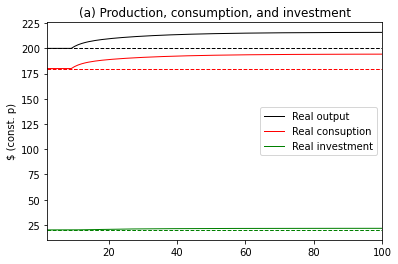

In [154]:
#Figure 2 - Baseline

#Figure 2(a) - Note: baseline scenario = 1
plt.plot(y_r[1],lw=1,color='k')
plt.title('(a) Production, consumption, and investment')
plt.plot(c_r[1],lw=1,color='r')
plt.plot(id_r[1],lw=1,color='g')
plt.axhline(y = (df['y_r_0'][0]), lw=1, color = 'k', linestyle = '--')
plt.axhline(y = (df['c_r_0'][0]), lw=1, color = 'r', linestyle = '--')
plt.axhline(y = (df['id_r_0'][0]), lw=1, color = 'g', linestyle = '--')
plt.xlim([2, 100])
plt.legend(('Real output','Real consuption','Real investment'), loc='right')
plt.ylabel('$ (const. p)')

#savefig('test.pdf')

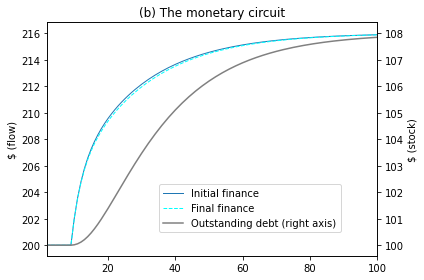

In [127]:
#Figure 2(b)
fig, ax1 = plt.subplots()
plt.title('(b) The monetary circuit')

ax1.plot(fin_i[1],lw=1,label = 'Initial finance')
ax1.set_ylabel('$ (flow)')
ax1.plot(fin_f[1],'--',lw=1,color='aqua',label = 'Final finance')
plt.xlim([2, 100])

ax2 = ax1.twinx()
ax2.plot(ld[1],color='grey',label = 'Outstanding debt (right axis)')
ax2.set_ylabel('$ (stock)')

fig.legend(loc='right', bbox_to_anchor=(0.3, 0, 0.5, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

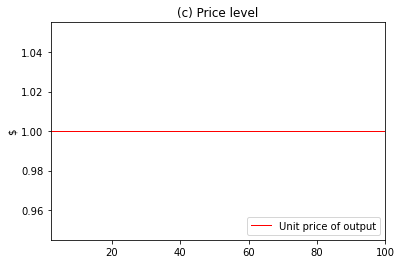

In [161]:
#Figure 2(c)
plt.plot(p[1],lw=1,color='r')
plt.xlim([2, 100])
plt.title('(c) Price level')
plt.ylabel('$')
plt.legend(('Unit price of output',''), loc='lower right')

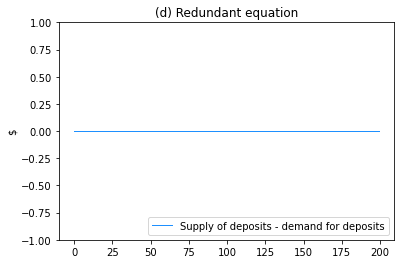

In [160]:
#Figure 2(d)
plt.plot(ms[1]-mh[1],lw=1,color='dodgerblue')
plt.ylim([-1, 1])
plt.title('(d) Redundant equation')
plt.ylabel('$')
plt.legend(('Supply of deposits - demand for deposits',''), loc='lower right')

Text(0, 0.5, 'Index')

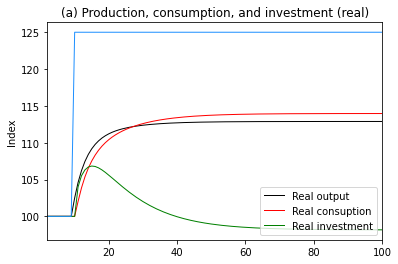

In [130]:
#Figure 3 - Shock to investment (quantity adjustment)

#Figure 3(a)
plt.plot(100*y_r[2]/y_r[0],lw=1,color='k')
plt.title('(a) Production, consumption, and investment (real)')
plt.plot(100*cw_r[2]/cw_r[0],lw=1,color='r')
plt.plot(100*cz_r[2]/cz_r[0],lw=1,color='g')
plt.plot(100*id_r[2]/id_r[0],lw=1,color='dodgerblue')
plt.xlim([2, 100])
plt.legend(('Real output','Real consuption','Real investment'), loc='lower right')
plt.ylabel('Index')

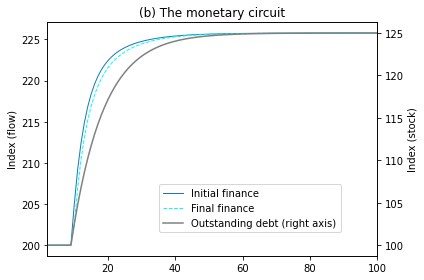

In [131]:
#Figure 3(b)
fig, ax1 = plt.subplots()
plt.title('(b) The monetary circuit')

ax1.plot(fin_i[2],lw=1,label = 'Initial finance')
ax1.set_ylabel('Index (flow)')
ax1.plot(fin_f[2],'--',lw=1,color='aqua',label = 'Final finance')
plt.xlim([2, 100])

ax2 = ax1.twinx()
ax2.plot(ld[2],color='grey',label = 'Outstanding debt (right axis)')
ax2.set_ylabel('Index (stock)')

fig.legend(loc='right', bbox_to_anchor=(0.3, 0, 0.5, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

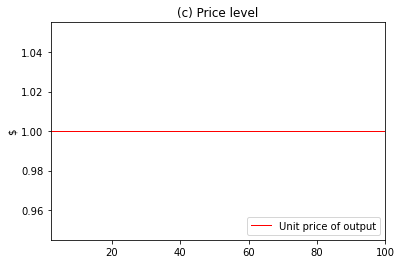

In [162]:
#Figure 3(c)
plt.plot(p[2],lw=1,color='r')
plt.xlim([2, 100])
plt.title('(c) Price level')
plt.ylabel('$')
plt.legend(('Unit price of output',''), loc='lower right')

Text(0, 0.5, 'Index')

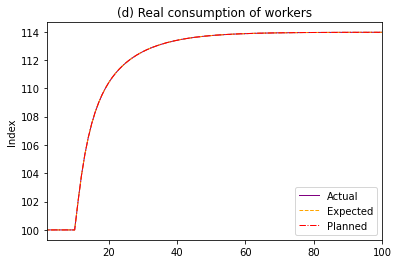

In [133]:
#Figure 3(d)
plt.plot(100*cw_r[2]/cw_r[0],lw=1,color='purple')
plt.title('(d) Real consumption of workers')
plt.plot(100*cw_r_t[2]/cw_r_t[0],'--',lw=1,color='orange')
plt.plot(100*cw_r_t[2]/cw_r_t[0],'-.',lw=1,color='r')
plt.xlim([2, 100])
plt.legend(('Actual','Expected','Planned'), loc='lower right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

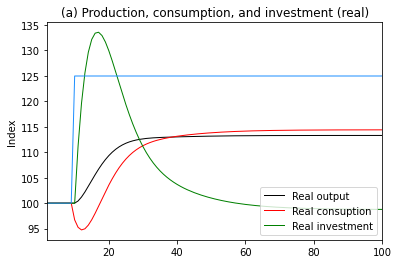

In [134]:
#Figure 4 - Shock to investment (mixed adjustment)

#Figure 4(a)
plt.plot(100*y_r[3]/y_r[0],lw=1,color='k')
plt.title('(a) Production, consumption, and investment (real)')
plt.plot(100*cw_r[3]/cw_r[0],lw=1,color='r')
plt.plot(100*cz_r[3]/cz_r[0],lw=1,color='g')
plt.plot(100*id_r[3]/id_r[0],lw=1,color='dodgerblue')
plt.xlim([2, 100])
plt.legend(('Real output','Real consuption','Real investment'), loc='lower right')
plt.ylabel('Index')

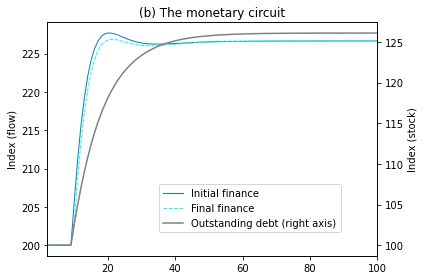

In [135]:
#Figure 4(b)
fig, ax1 = plt.subplots()
plt.title('(b) The monetary circuit')

ax1.plot(fin_i[3],lw=1,label = 'Initial finance')
ax1.set_ylabel('Index (flow)')
ax1.plot(fin_f[3],'--',lw=1,color='aqua',label = 'Final finance')
plt.xlim([2, 100])

ax2 = ax1.twinx()
ax2.plot(ld[3],color='grey',label = 'Outstanding debt (right axis)')
ax2.set_ylabel('Index (stock)')

fig.legend(loc='right', bbox_to_anchor=(0.3, 0, 0.5, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

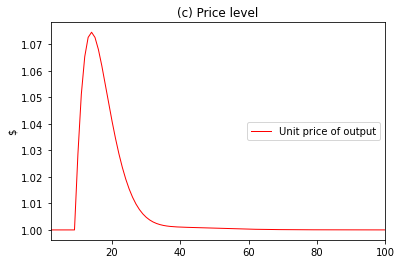

In [164]:
#Figure 4(c)
plt.plot(p[3],lw=1,color='r')
plt.xlim([2, 100])
plt.title('(c) Price level')
plt.ylabel('$')
plt.legend(('Unit price of output',''), loc='right')

Text(0, 0.5, 'Index')

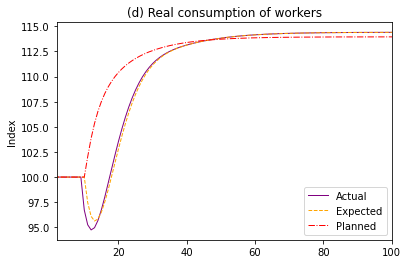

In [137]:
#Figure 4(d)
plt.plot(100*cw_r[3]/cw_r[0],lw=1,color='purple')
plt.title('(d) Real consumption of workers')
plt.plot(100*cw_r_t[3]/cw_r_t[0],'--',lw=1,color='orange')
plt.plot(100*cw_r_t[2]/cw_r_t[0],'-.',lw=1,color='r')
plt.xlim([2, 100])
plt.legend(('Actual','Expected','Planned'), loc='lower right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

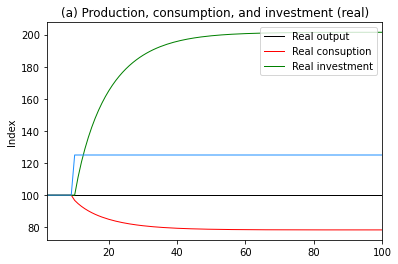

In [138]:
#Figure 5 - Shock to investment (price adjustment)

#Figure 5(a)
plt.plot(100*y_r[4]/y_r[0],lw=1,color='k')
plt.title('(a) Production, consumption, and investment (real)')
plt.plot(100*cw_r[4]/cw_r[0],lw=1,color='r')
plt.plot(100*cz_r[4]/cz_r[0],lw=1,color='g')
plt.plot(100*id_r[4]/id_r[0],lw=1,color='dodgerblue')
plt.xlim([2, 100])
plt.legend(('Real output','Real consuption','Real investment'), loc='upper right')
plt.ylabel('Index')

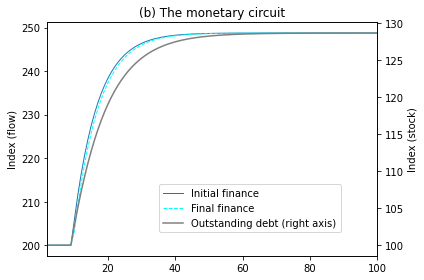

In [139]:
#Figure 5(b)
fig, ax1 = plt.subplots()
plt.title('(b) The monetary circuit')

ax1.plot(fin_i[4],lw=1,label = 'Initial finance')
ax1.set_ylabel('Index (flow)')
ax1.plot(fin_f[4],'--',lw=1,color='aqua',label = 'Final finance')
plt.xlim([2, 100])

ax2 = ax1.twinx()
ax2.plot(ld[4],color='grey',label = 'Outstanding debt (right axis)')
ax2.set_ylabel('Index (stock)')

fig.legend(loc='right', bbox_to_anchor=(0.3, 0, 0.5, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

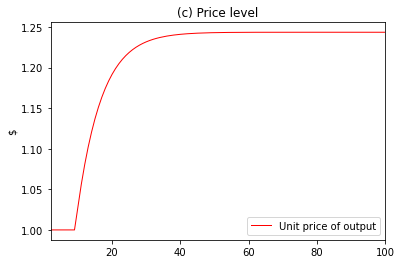

In [165]:
#Figure 5(c)
plt.plot(p[4],lw=1,color='r')
plt.xlim([2, 100])
plt.title('(c) Price level')
plt.ylabel('$')
plt.legend(('Unit price of output',''), loc='lower right')

Text(0, 0.5, 'Index')

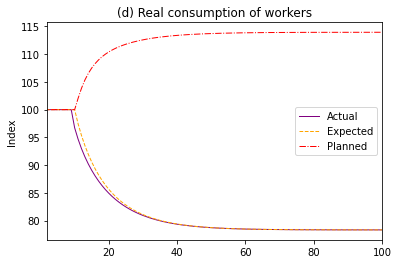

In [141]:
#Figure 5(d)
plt.plot(100*cw_r[4]/cw_r[0],lw=1,color='purple')
plt.title('(d) Real consumption of workers')
plt.plot(100*cw_r_t[4]/cw_r_t[0],'--',lw=1,color='orange')
plt.plot(100*cw_r_t[2]/cw_r_t[0],'-.',lw=1,color='r')
plt.xlim([2, 100])
plt.legend(('Actual','Expected','Planned'), loc='right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

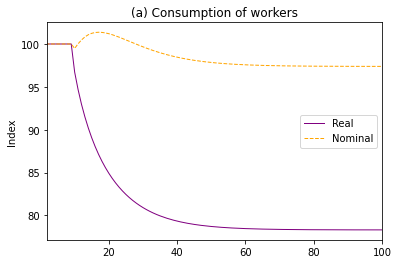

In [142]:
#Figure 6 - Forced saving

#Figure 6a
plt.plot(100*cw_r[4]/cw_r[0],lw=1,color='purple')
plt.title('(a) Consumption of workers')
plt.plot(100*cw[4]/cw[0],'--',lw=1,color='orange')
plt.xlim([2, 100])
plt.legend(('Real','Nominal'), loc='right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

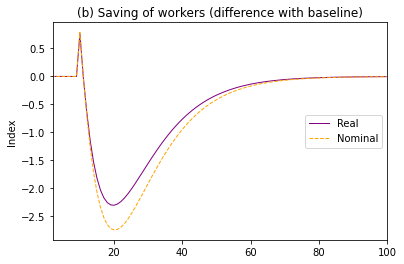

In [143]:
#Figure 6b
plt.plot(((ydw[4]-cw[4])/p[4])-((ydw[0]-cw[0])/p[0]),lw=1,color='purple')
plt.title('(b) Saving of workers (difference with baseline)')
plt.plot(((ydw[4]-cw[4]))-((ydw[0]-cw[0])),'--',lw=1,color='orange')
plt.xlim([2, 100])
plt.legend(('Real','Nominal'), loc='right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

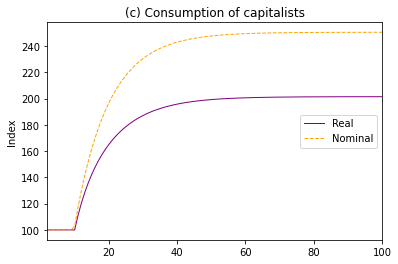

In [144]:
#Figure 6c
plt.plot(100*cz_r[4]/cz_r[0],lw=1,color='purple')
plt.title('(c) Consumption of capitalists')
plt.plot(100*cz[4]/cz[0],'--',lw=1,color='orange')
plt.xlim([2, 100])
plt.legend(('Real','Nominal'), loc='right')
plt.ylabel('Index')

Text(0, 0.5, 'Index')

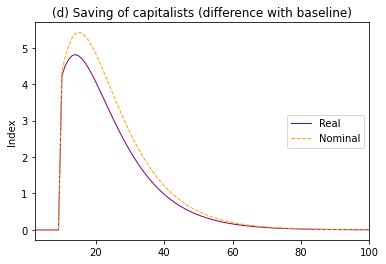

In [145]:
#Figure 6d
plt.plot(((ydz[4]-cz[4])/p[4])-((ydz[0]-cz[0])/p[0]),lw=1,color='purple')
plt.title('(d) Saving of capitalists (difference with baseline)')
plt.plot(((ydz[4]-cz[4]))-((ydz[0]-cz[0])),'--',lw=1,color='orange')
plt.xlim([2, 100])
plt.legend(('Real','Nominal'), loc='right')
plt.ylabel('Index')

Text(0, 0.5, 'N')

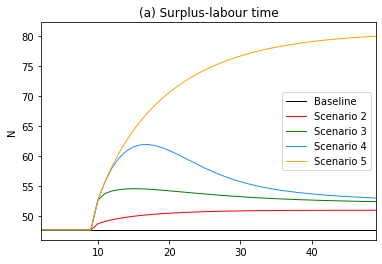

In [146]:
#Figure 7 - Exploitation of workers

#Figure 7a
plt.plot(slt[0],lw=1,color='k')
plt.title('(a) Surplus-labour time')
plt.plot(slt[1],lw=1,color='r')
plt.plot(slt[2],lw=1,color='g')
plt.plot(slt[3],lw=1,color='dodgerblue')
plt.plot(slt[4],lw=1,color='orange')
plt.xlim([2, 49])
plt.legend(('Baseline','Scenario 2','Scenario 3','Scenario 4','Scenario 5'), loc='right')
plt.ylabel('N')

Text(0, 0.5, '%')

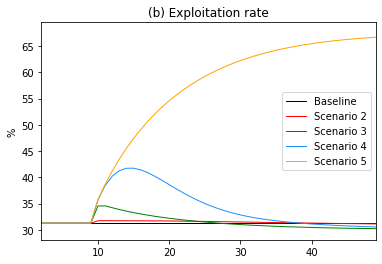

In [147]:
#Figure 7b
plt.plot(100*expl[0],lw=1,color='k')
plt.title('(b) Exploitation rate')
plt.plot(100*expl[1],lw=1,color='r')
plt.plot(100*expl[2],lw=1,color='g')
plt.plot(100*expl[3],lw=1,color='dodgerblue')
plt.plot(100*expl[4],lw=1,color='orange')
plt.xlim([2, 49])
plt.legend(('Baseline','Scenario 2','Scenario 3','Scenario 4','Scenario 5'), loc='right')
plt.ylabel('%')